# Lets get Data

In [1]:
from bs4 import BeautifulSoup
import requests
import json

import pandas as pd

# Data with API in alphavantage

In [1]:

api_key = "6XY0HU46MVCTUHXO"
url = "https://www.alphavantage.co/query"
params = {
    "function": "TIME_SERIES_DAILY",
    "symbol": "AAPL",  
    "apikey": api_key,
    "outputsize": "compact"  
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    # Отобразим JSON ответ красиво
    print(json.dumps(data, indent=4))
else:
    print(f"Ошибка: {response.status_code}")


{
    "Meta Data": {
        "1. Information": "Daily Prices (open, high, low, close) and Volumes",
        "2. Symbol": "AAPL",
        "3. Last Refreshed": "2024-10-30",
        "4. Output Size": "Compact",
        "5. Time Zone": "US/Eastern"
    },
    "Time Series (Daily)": {
        "2024-10-30": {
            "1. open": "232.6100",
            "2. high": "233.4700",
            "3. low": "229.5500",
            "4. close": "230.1000",
            "5. volume": "47070907"
        },
        "2024-10-29": {
            "1. open": "233.1000",
            "2. high": "234.3250",
            "3. low": "232.3200",
            "4. close": "233.6700",
            "5. volume": "35417247"
        },
        "2024-10-28": {
            "1. open": "233.3200",
            "2. high": "234.7300",
            "3. low": "232.5500",
            "4. close": "233.4000",
            "5. volume": "36087134"
        },
        "2024-10-25": {
            "1. open": "229.7400",
            "2. high": "23

In [55]:
api_key = '6XY0HU46MVCTUHXO'
symbol = 'AAPL'  # Замените на нужный тикер
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}&outputsize=full'

# Выполнение запроса к API
response = requests.get(url)
data = response.json()

# Проверка на наличие данных
if 'Time Series (Daily)' in data:
    prices = data['Time Series (Daily)']
    
    # Преобразование данных в DataFrame
    df = pd.DataFrame(prices).T
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    
    # Сохранение в CSV
    df.to_csv('historical_prices2.csv')
    print("Данные успешно собраны и сохранены в 'historical_prices.csv'.")
else:
    print("Ошибка: данные не найдены или недоступны.")


Данные успешно собраны и сохранены в 'historical_prices.csv'.


In [83]:
df=pd.read_csv("C:\\Users\\Asus\\Downloads\\historical_prices2.csv")
df

,Unnamed: 0,Open,High,Low,Close,Volume
0,2024-10-23,234.080,235.144,227.76,230.76,52286979
1,2024-10-22,233.885,236.220,232.60,235.86,38846578
2,2024-10-21,234.450,236.850,234.45,236.48,36254470
3,2024-10-18,236.180,236.180,234.01,235.00,46431472
4,2024-10-17,233.430,233.850,230.52,232.15,32993810
...,...,...,...,...,...,...
6280,1999-11-05,84.620,88.370,84.00,88.31,3721500
6281,1999-11-04,82.060,85.370,80.62,83.62,3384700
6282,1999-11-03,81.620,83.250,81.00,81.50,2932700
6283,1999-11-02,78.000,81.690,77.31,80.25,3564600


In [5]:
df3.isnull().sum()

Unnamed: 0    0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64

## if Null value we can fill w`ith median or KNN imputer . if categorical(limited) with mode

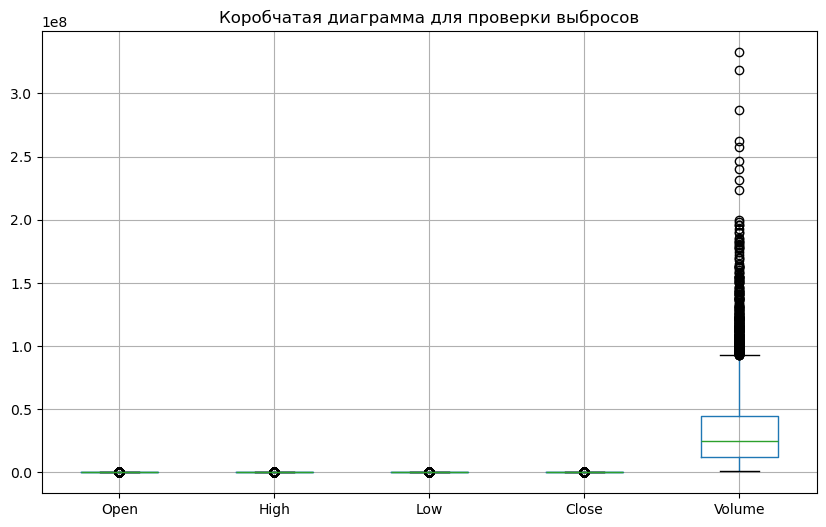

In [108]:
import matplotlib.pyplot as plt

# Построение коробчатой диаграммы для проверки выбросов
plt.figure(figsize=(10, 6))
df[['Open', 'High', 'Low', 'Close', 'Volume']].boxplot()
plt.title('Коробчатая диаграмма для проверки выбросов')
plt.show()


In [84]:
df['Date'] = pd.to_datetime(df['Unnamed: 0'])

In [41]:
df

,Unnamed: 0,Open,High,Low,Close,Volume,Date
0,2024-10-23,234.080,235.144,227.76,230.76,52286979,2024-10-23
1,2024-10-22,233.885,236.220,232.60,235.86,38846578,2024-10-22
2,2024-10-21,234.450,236.850,234.45,236.48,36254470,2024-10-21
3,2024-10-18,236.180,236.180,234.01,235.00,46431472,2024-10-18
4,2024-10-17,233.430,233.850,230.52,232.15,32993810,2024-10-17
...,...,...,...,...,...,...,...
6280,1999-11-05,84.620,88.370,84.00,88.31,3721500,1999-11-05
6281,1999-11-04,82.060,85.370,80.62,83.62,3384700,1999-11-04
6282,1999-11-03,81.620,83.250,81.00,81.50,2932700,1999-11-03
6283,1999-11-02,78.000,81.690,77.31,80.25,3564600,1999-11-02


In [85]:
df=df.drop(columns='Unnamed: 0')
df

,Open,High,Low,Close,Volume,Date
0,234.080,235.144,227.76,230.76,52286979,2024-10-23
1,233.885,236.220,232.60,235.86,38846578,2024-10-22
2,234.450,236.850,234.45,236.48,36254470,2024-10-21
3,236.180,236.180,234.01,235.00,46431472,2024-10-18
4,233.430,233.850,230.52,232.15,32993810,2024-10-17
...,...,...,...,...,...,...
6280,84.620,88.370,84.00,88.31,3721500,1999-11-05
6281,82.060,85.370,80.62,83.62,3384700,1999-11-04
6282,81.620,83.250,81.00,81.50,2932700,1999-11-03
6283,78.000,81.690,77.31,80.25,3564600,1999-11-02


#### визализируем открытие и закрытеие( так мы можем увидеть разницу)

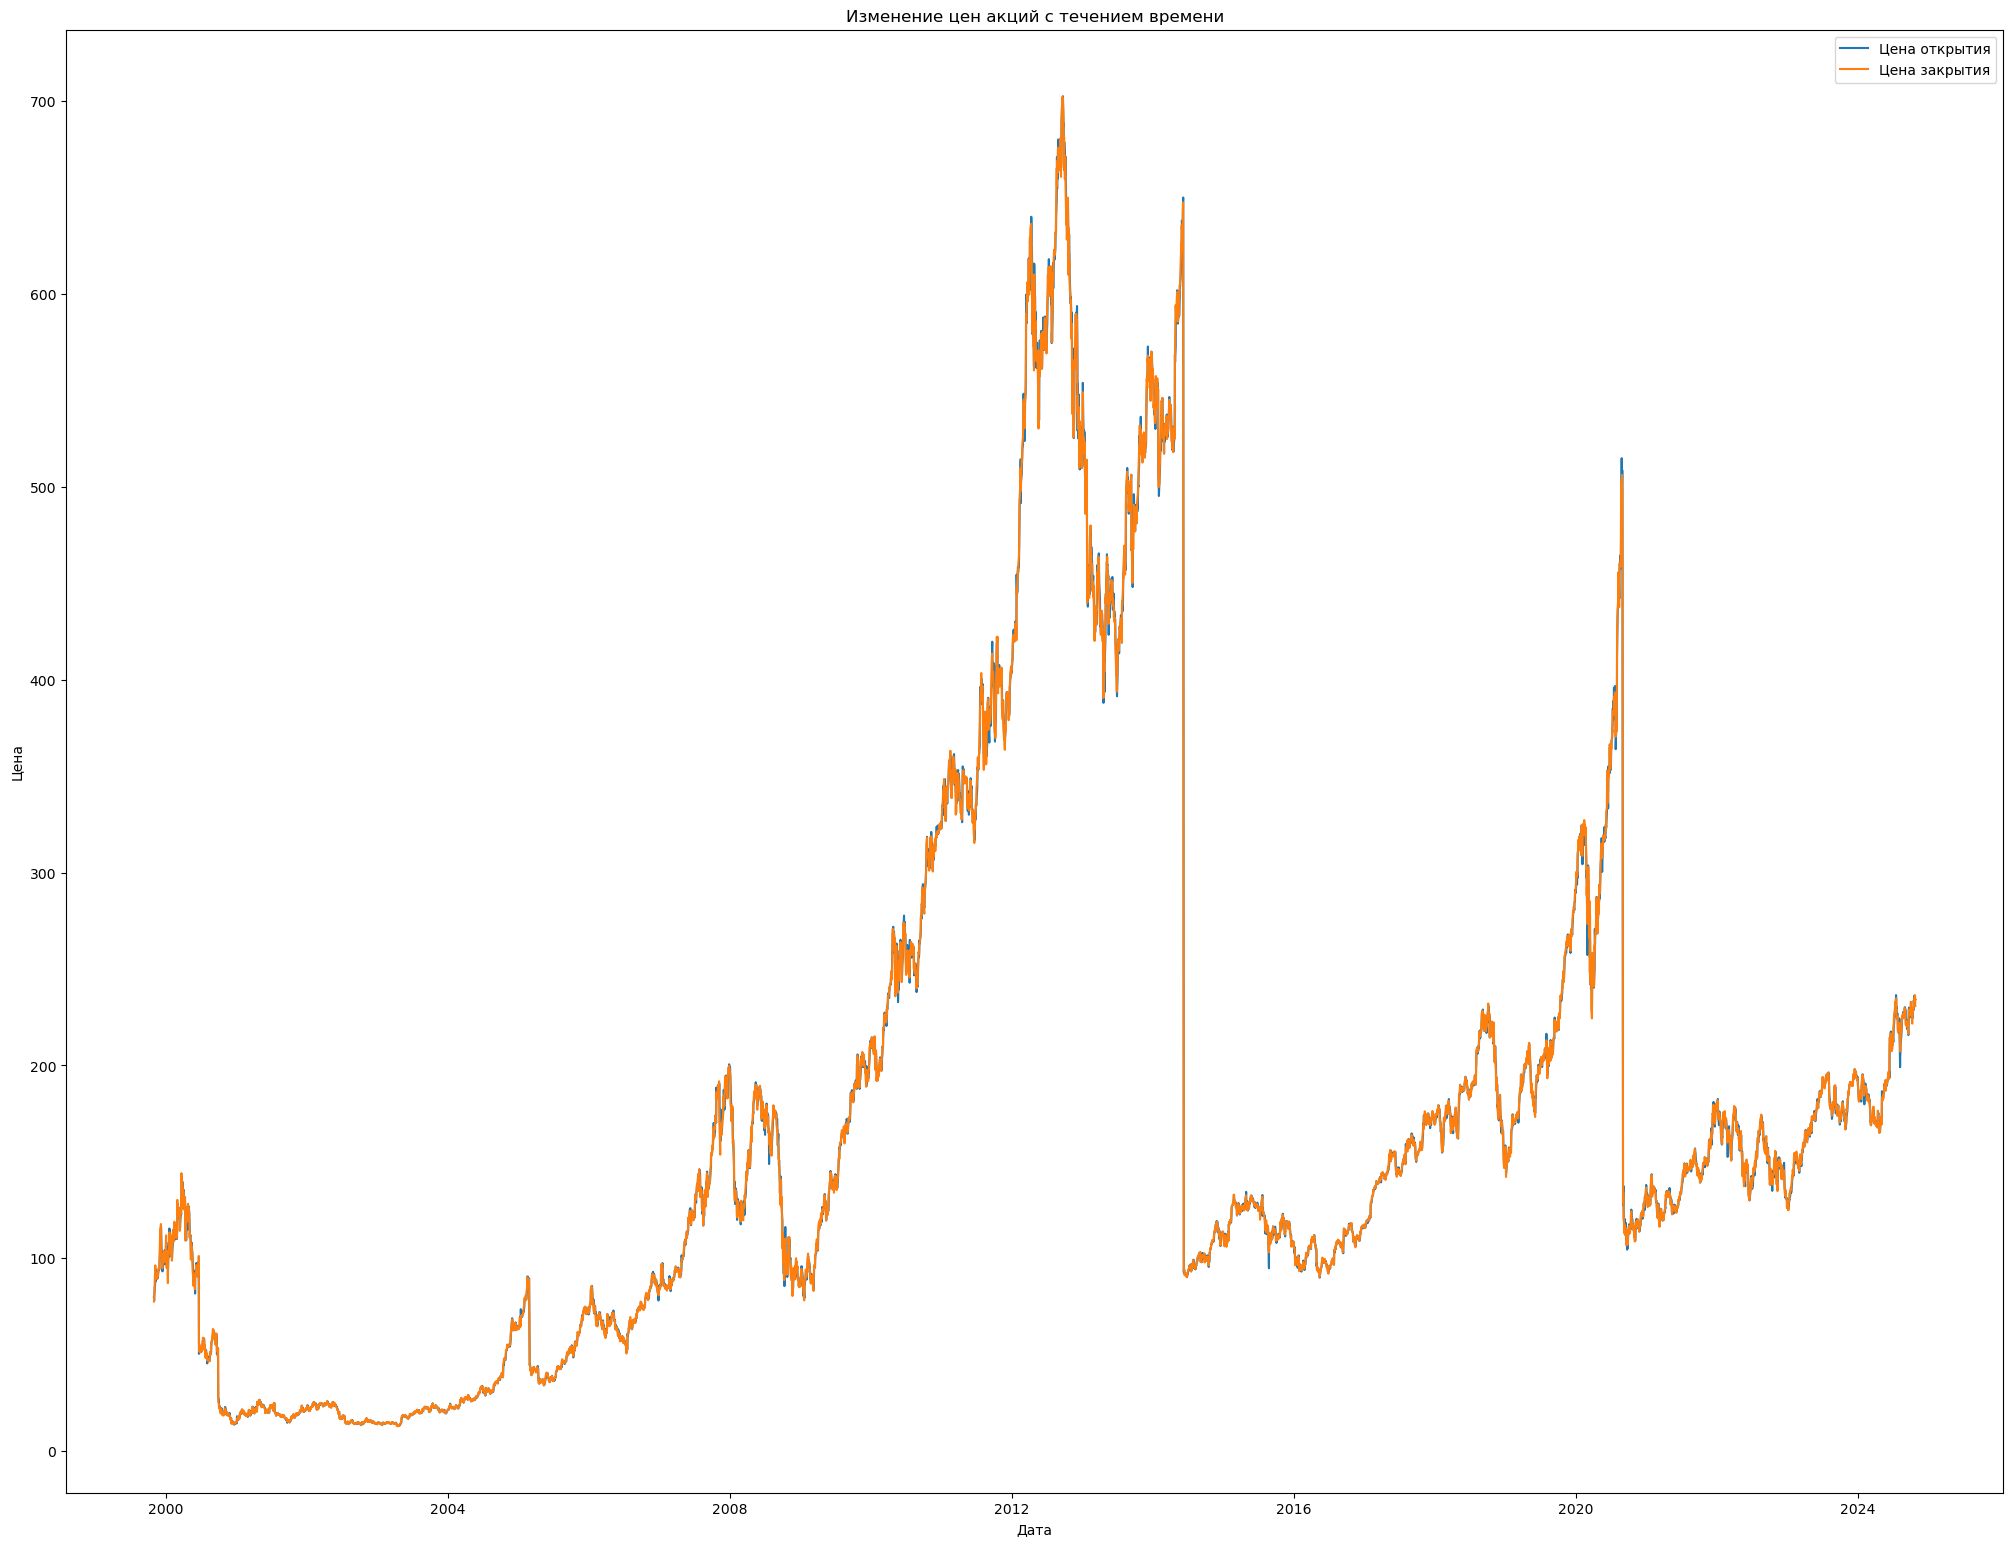

In [43]:
import matplotlib.pyplot as plt
# Построим график цен открытия и закрытия
plt.figure(figsize=(25,19))
plt.plot(df['Date'], df['Open'], label='Цена открытия')
plt.plot(df['Date'], df['Close'], label='Цена закрытия')
plt.title('Изменение цен акций с течением времени')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()


##### здесь мы видим есть немного разницы акций на кд день
#### 2011-2014 был пик акцийй

##### увидим разницу между самым дешевым и дорогим акцим чтобы увидеть максимальную прибиль

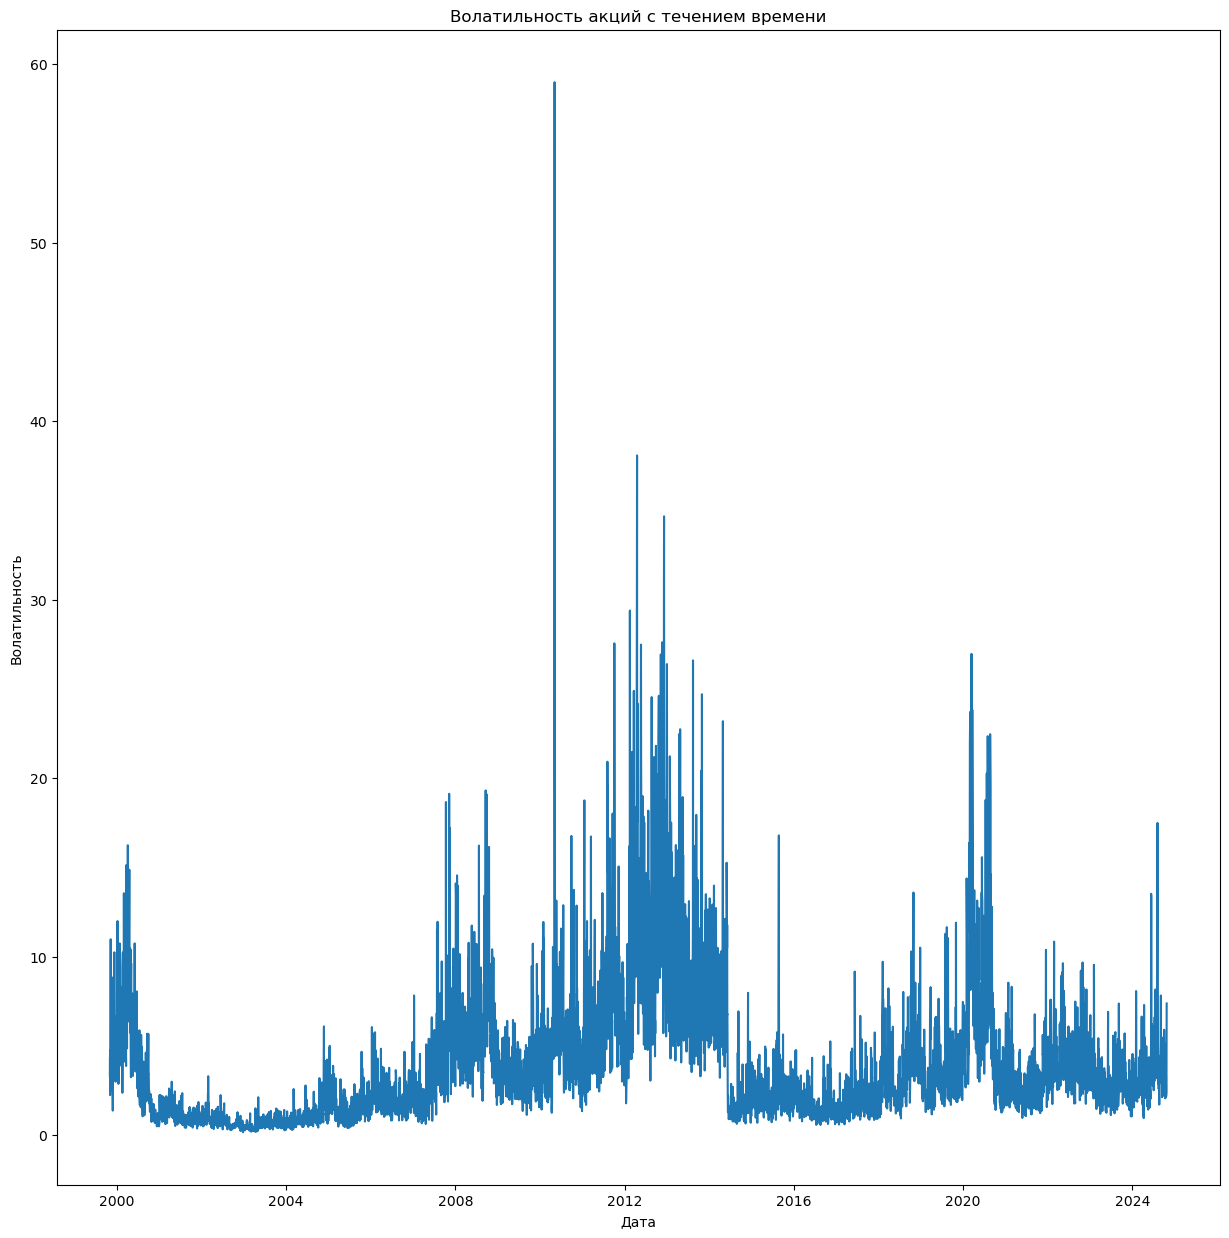

In [97]:
# Волатильность как разница между High и Low
df['Volatility'] = df['High'] - df['Low']

# Построим график волатильности
plt.figure(figsize=(15,15))
plt.plot(df['Date'], df['Volatility'], label='Волатильность')
plt.title('Волатильность акций с течением времени')
plt.xlabel('Дата')
plt.ylabel('Волатильность')
plt.show()


In [11]:
print(f'макс пайда {df3['Volatility'].max()}, пайда аз{df3['Volatility'].min()},орташа {df3['Volatility'].mean()}')

макс пайда 59.0, пайда аз0.16999999999999993,орташа 3.9526902466189338


              Open         High          Low        Close        Volume  \
count  6285.000000  6285.000000  6285.000000  6285.000000  6.285000e+03   
mean    174.250530   176.177311   172.224621   174.260523  3.313696e+07   
min      12.990000    13.190000    12.720000    13.120000  7.025000e+05   
25%      78.760000    79.560000    77.330000    78.360000  1.209940e+07   
50%     139.050000   140.850000   137.060000   139.072000  2.462681e+07   
75%     202.380000   204.610000   200.480000   202.750000  4.434024e+07   
max     702.410000   705.070000   699.570000   702.100000  3.326072e+08   
std     147.104638   148.316517   145.693844   147.041170  3.057629e+07   

                                Date   Volatility  
count                           6285  6285.000000  
mean   2012-04-28 16:59:34.224343552     3.952690  
min              1999-11-01 00:00:00     0.170000  
25%              2006-02-01 00:00:00     1.470000  
50%              2012-04-27 00:00:00     2.760000  
75%         

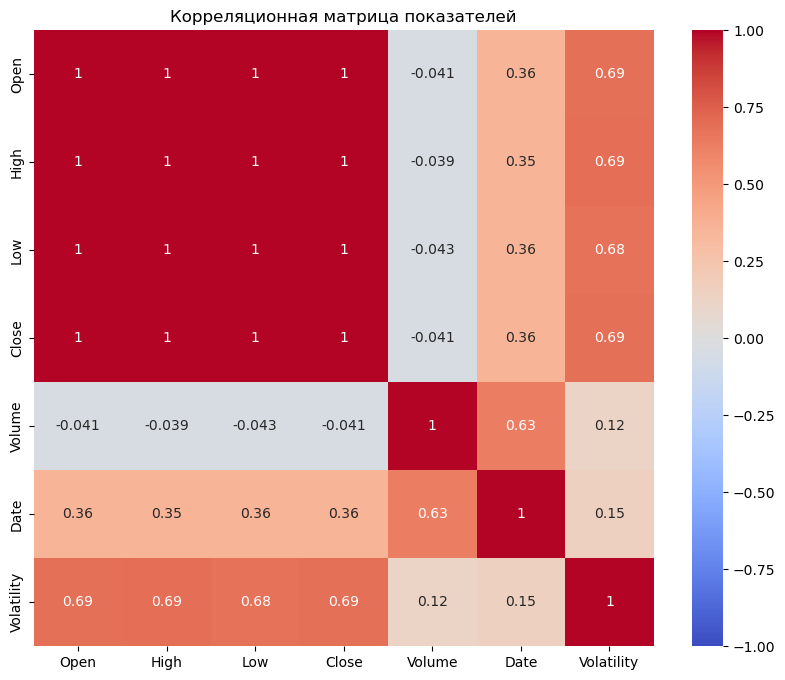

In [66]:
# Статистическое описание данных
print(df.describe())
# Корреляционный анализ
print(df.corr())
# Построим корреляционную матрицу
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица показателей')
plt.show()


# We show that open, hihht low close have very hight corrolation-> they are approximately equal

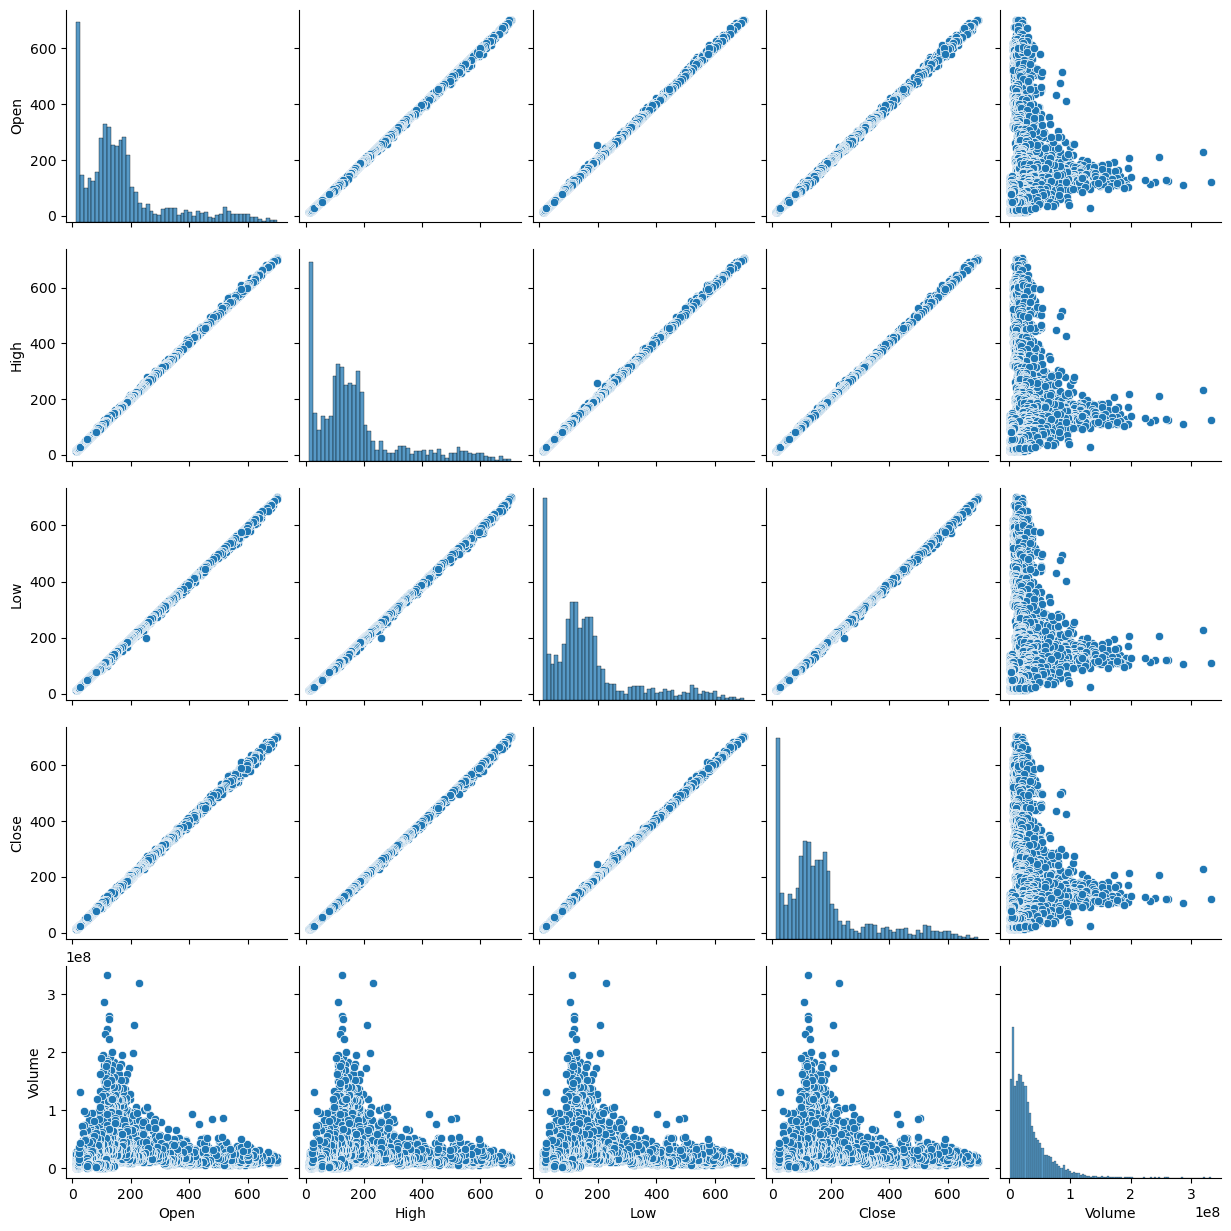

In [71]:
sns.pairplot(df3)
plt.show()

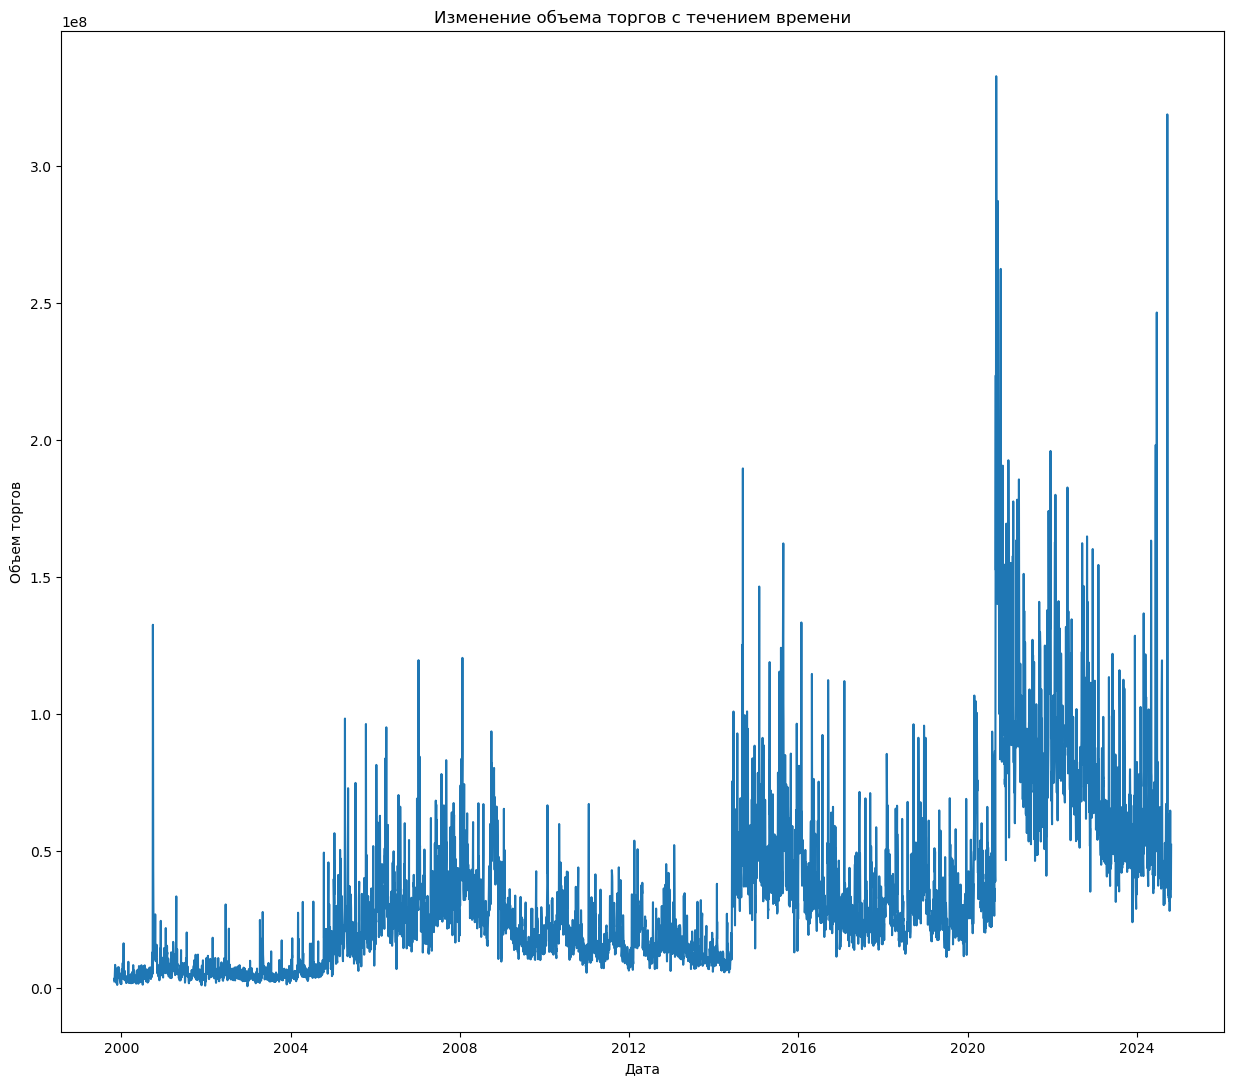

In [67]:
# Построим график объема торгов
plt.figure(figsize=(15,13))
plt.plot(df3['Date'], df3['Volume'], label='Объем торгов')
plt.title('Изменение объема торгов с течением времени')
plt.xlabel('Дата')
plt.ylabel('Объем торгов')
plt.show()


#### мы ВиДим ЧтО в 2010-2014 БЫлО МАЛо КОлиЧ но цЕна бЫЛо ВЫсОКа

In [68]:
df['Volume'].max()

332607163

In [72]:
df3[df['Volume'] == df['Volume'].max()]

,Open,High,Low,Close,Volume,Date,Volatility
1039,120.07,123.7,110.89,120.96,332607163,2020-09-04,12.81


In [45]:
df[df['Close'] == df['Close'].max()]

,Open,High,Low,Close,Volume
Date,,,,,
2012-09-19,700.26,703.99,699.57,702.1,11674100


In [73]:
df[df['Volume'] == df['Volume'].min()]

,Open,High,Low,Close,Volume,Date,Volatility
5494,14.44,14.47,14.3,14.36,702500,2002-12-24,0.17


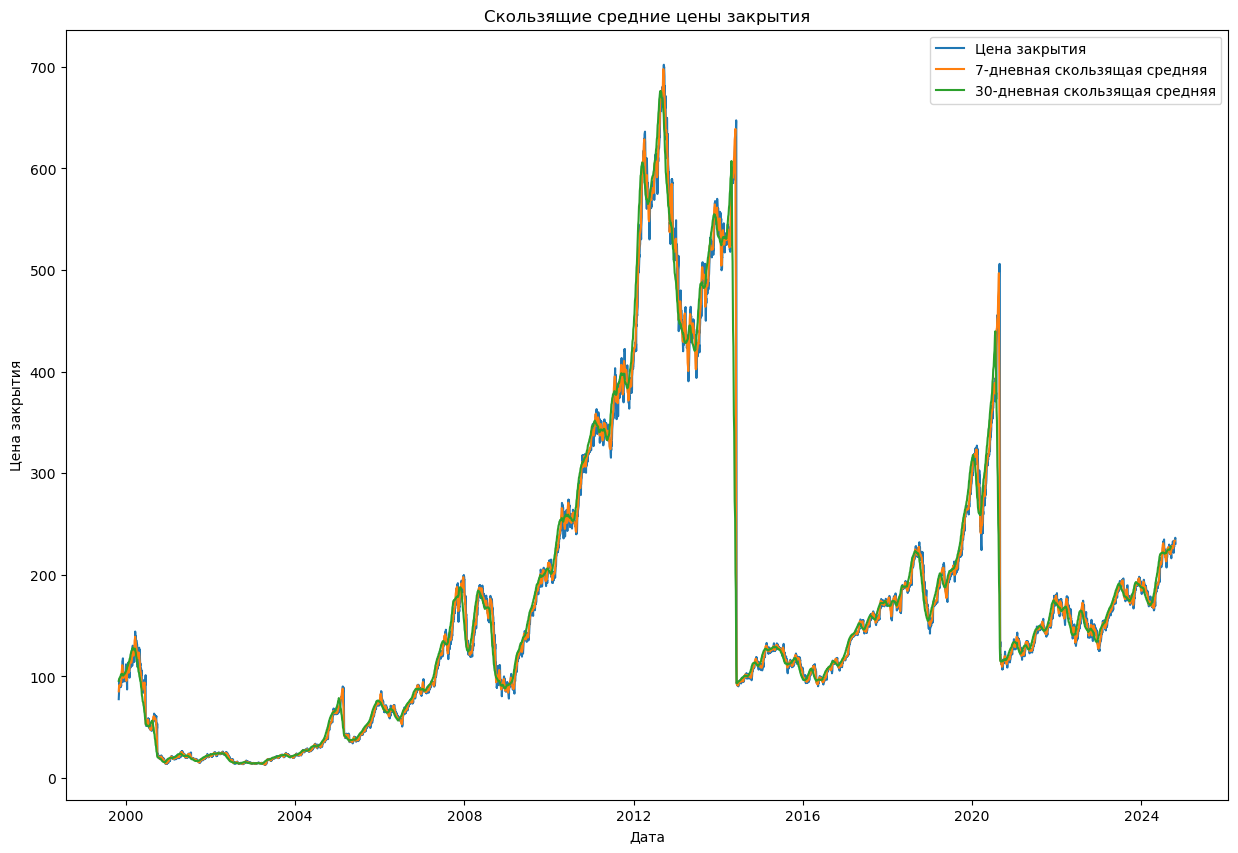

In [98]:
# Добавляем скользящие средние сред знач за 7,30 дней

df['7_day_MA'] = df['Close'].rolling(window=7).mean()
df['30_day_MA'] = df['Close'].rolling(window=30).mean()

# Визуализируем скользящие средние
plt.figure(figsize=(15,10))
plt.plot(df['Date'], df['Close'], label='Цена закрытия')
plt.plot(df['Date'], df['7_day_MA'], label='7-дневная скользящая средняя')
plt.plot(df['Date'], df['30_day_MA'], label='30-дневная скользящая средняя')
plt.title('Скользящие средние цены закрытия')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend()
plt.show()


###### Если короткосрочная (7-дневная) линия пересекает долгосрочную (30-дневную) линию снизу вверх, это может означать начало восходящего тренда (сигнал к покупке).
###### Если короткосрочная линия пересекает долгосрочную линию сверху вниз, это может означать начало нисходящего тренда (сигнал к продаже).

#### Дивергенция: Чем больше расстояние между короткосрочной и долгосрочной скользящими средними, тем сильнее тренд. Когда они сближаются, это может указывать на ослабление тренда.

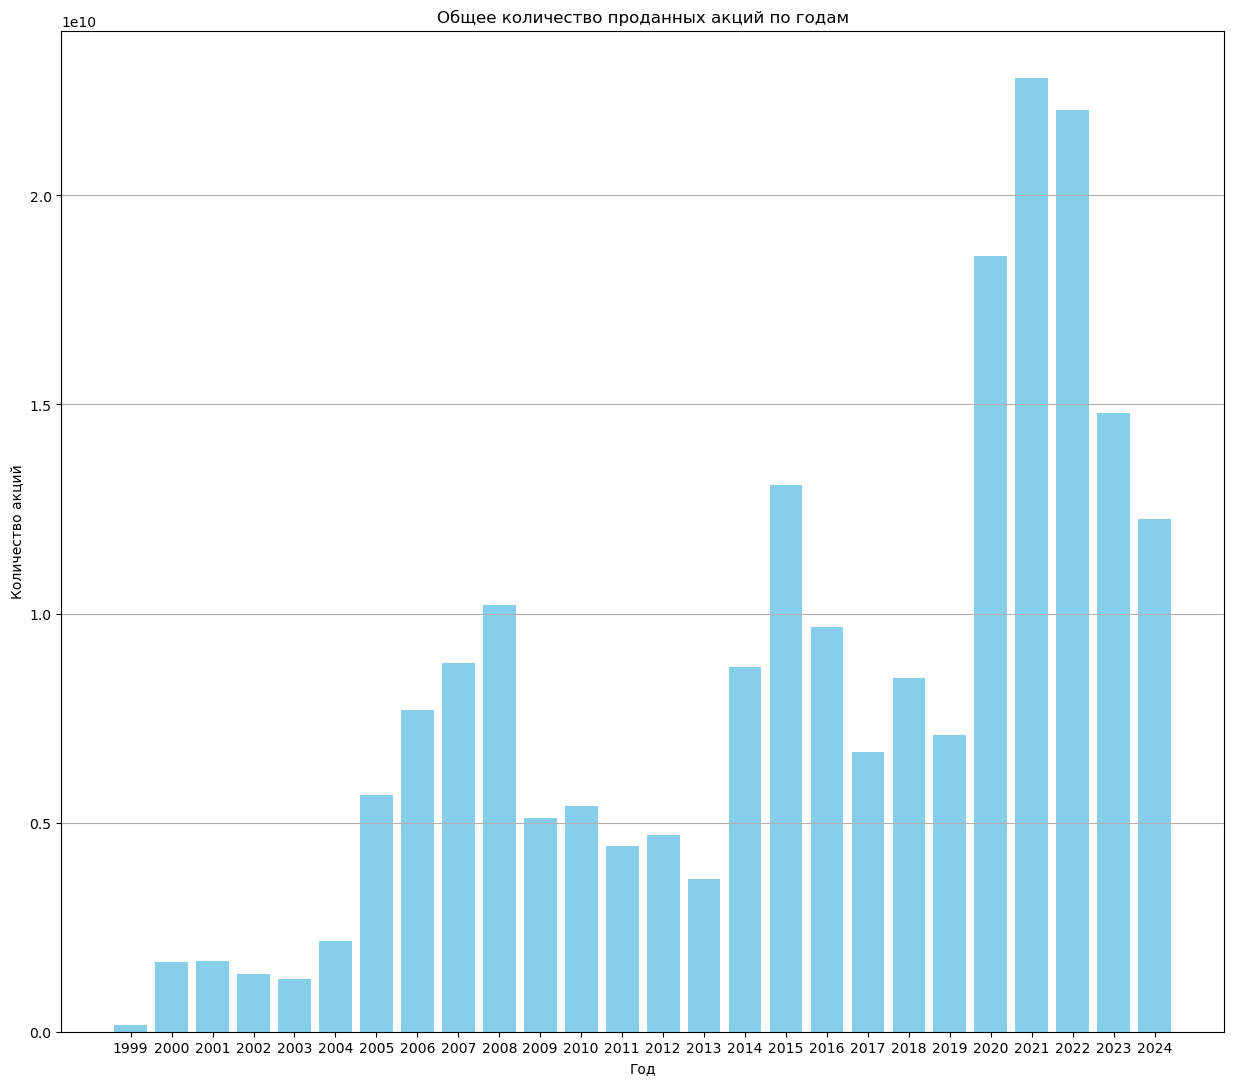

In [100]:
df['Year'] = df['Date'].dt.year

# Группировка данных по годам и суммирование объема
yearly_volume = df.groupby('Year')['Volume'].sum().reset_index()

# Визуализация данных
plt.figure(figsize=(15, 13))
plt.bar(yearly_volume['Year'], yearly_volume['Volume'], color='skyblue')
plt.title('Общее количество проданных акций по годам')
plt.xlabel('Год')
plt.ylabel('Количество акций')
plt.xticks(yearly_volume['Year'])
plt.grid(axis='y')

# Показать график
plt.show()

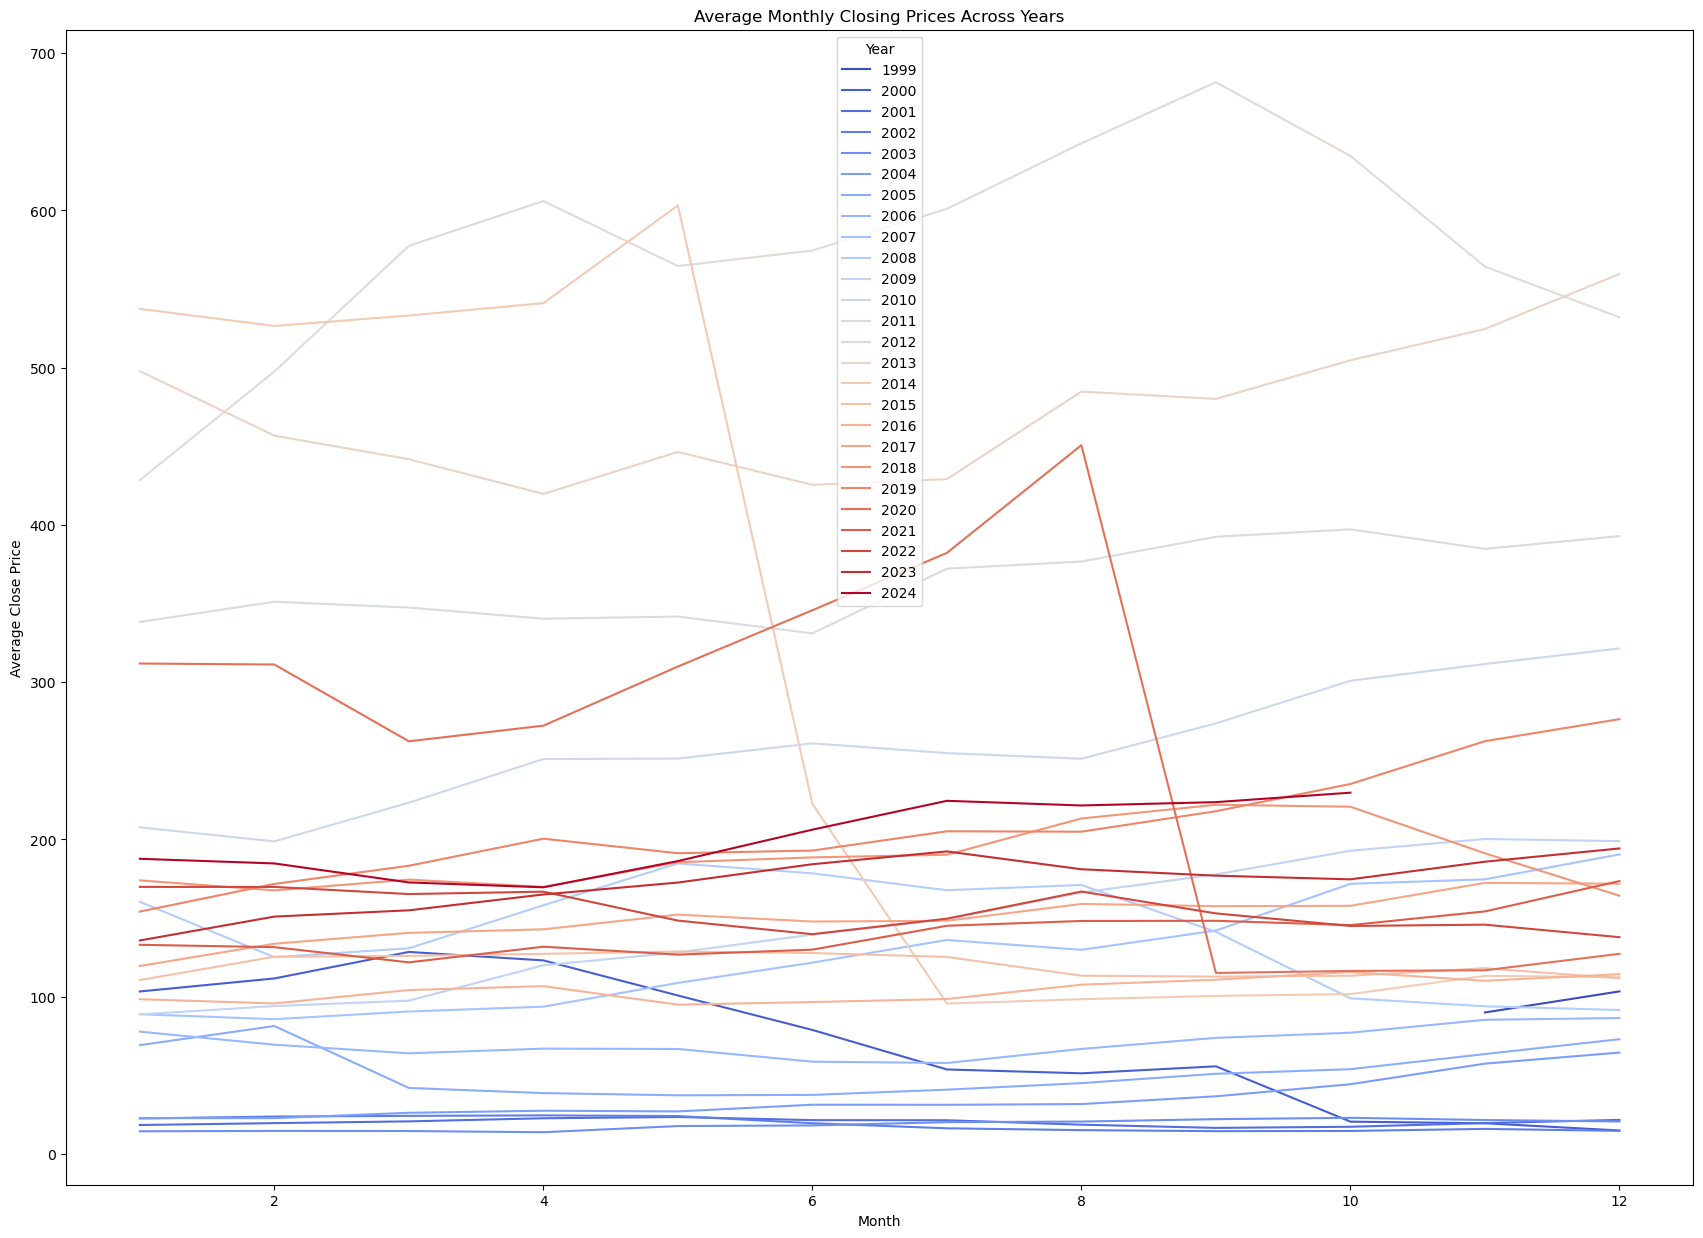

In [56]:
import seaborn as sns
# Группировка данных по годам и месяцам с расчетом среднего значения
df_monthly_avg = df.groupby(['Year', 'Month'])['Close'].mean().reset_index()

# Построение графика
plt.figure(figsize=(21, 15))
sns.lineplot(data=df_monthly_avg, x='Month', y='Close', hue='Year', palette='coolwarm', legend='full')
plt.title('Average Monthly Closing Prices Across Years')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.show()



In [ ]:
# как зависит макс цена от колич? 
# histog for count volume 
# 

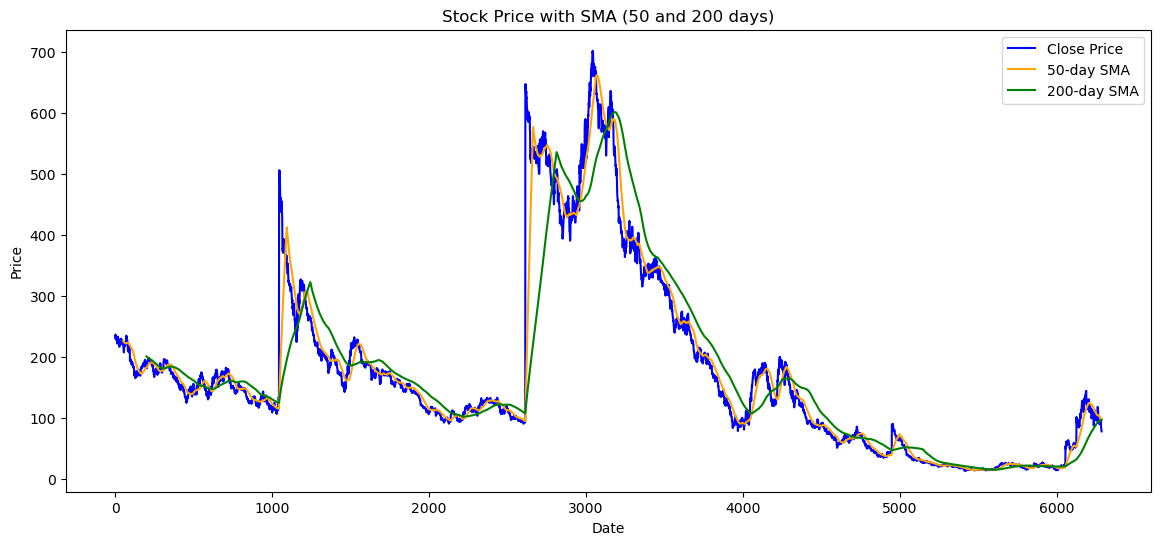

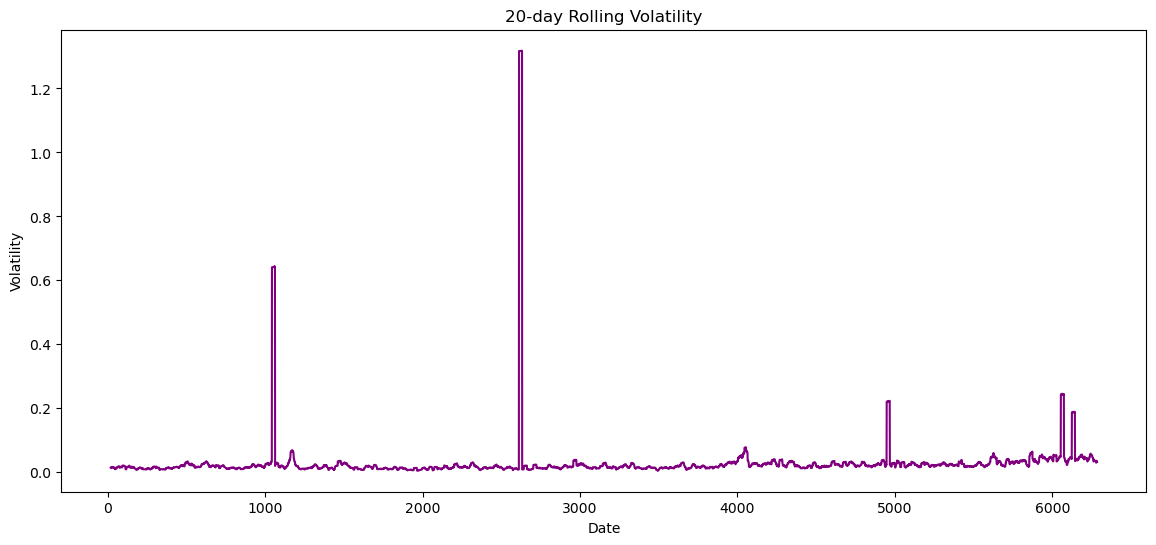

In [58]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()

# График с SMA и волатильностью
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA_50'], label='50-day SMA', color='orange')
plt.plot(df['SMA_200'], label='200-day SMA', color='green')
plt.title('Stock Price with SMA (50 and 200 days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(df['Volatility'], color='purple')
plt.title('20-day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


##### Волатильность показывает степень колебаний цены. Чем выше волатильность, тем больше отклонение цены, что может указывать на высокую неопределенность или повышенный риск.

In [78]:
df3[df3['Volatility']==df3['Volatility'].max()]

,Open,High,Low,Close,Volume,Date,Volatility,7_day_MA,30_day_MA,Year
3641,253.83,258.25,199.25,246.25,45923600,2010-05-06,59.0,252.412857,253.088467,2010


In [79]:
df3['Volume'].max()

332607163

In [60]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Date            0
Year            0
Month           0
SMA_50         49
SMA_200       199
Volatility     20
dtype: int64

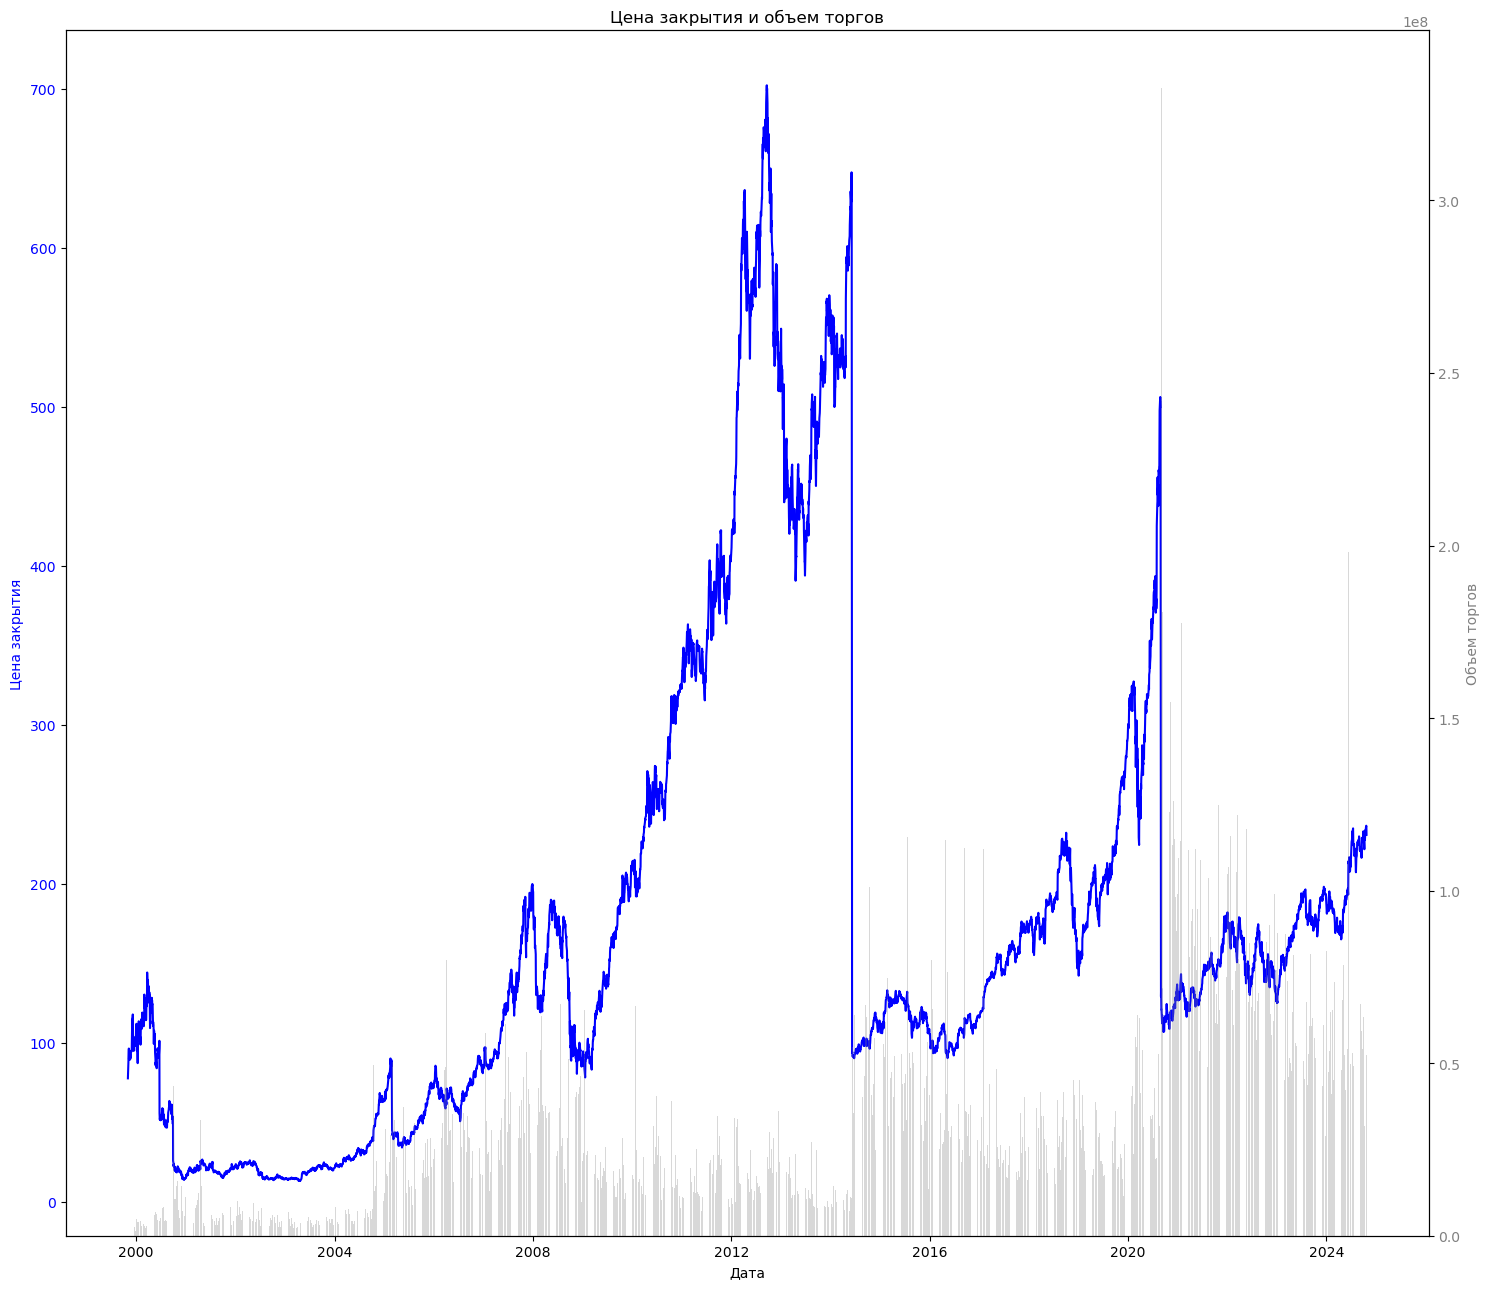

In [82]:
# Построим два графика: цены закрытия и объема торгов
fig, ax1 = plt.subplots(figsize=(15,13))

# График цены закрытия
ax1.plot(df['Date'], df['Close'], color='blue', label='Цена закрытия')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Цена закрытия', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Второй ось Y для объема торгов
ax2 = ax1.twinx()  
ax2.bar(df3['Date'], df3['Volume'], alpha=0.3, color='gray', label='Объем торгов')
ax2.set_ylabel('Объем торгов', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Заголовок и отображение графиков
plt.title('Цена закрытия и объем торгов')
fig.tight_layout()
plt.show()


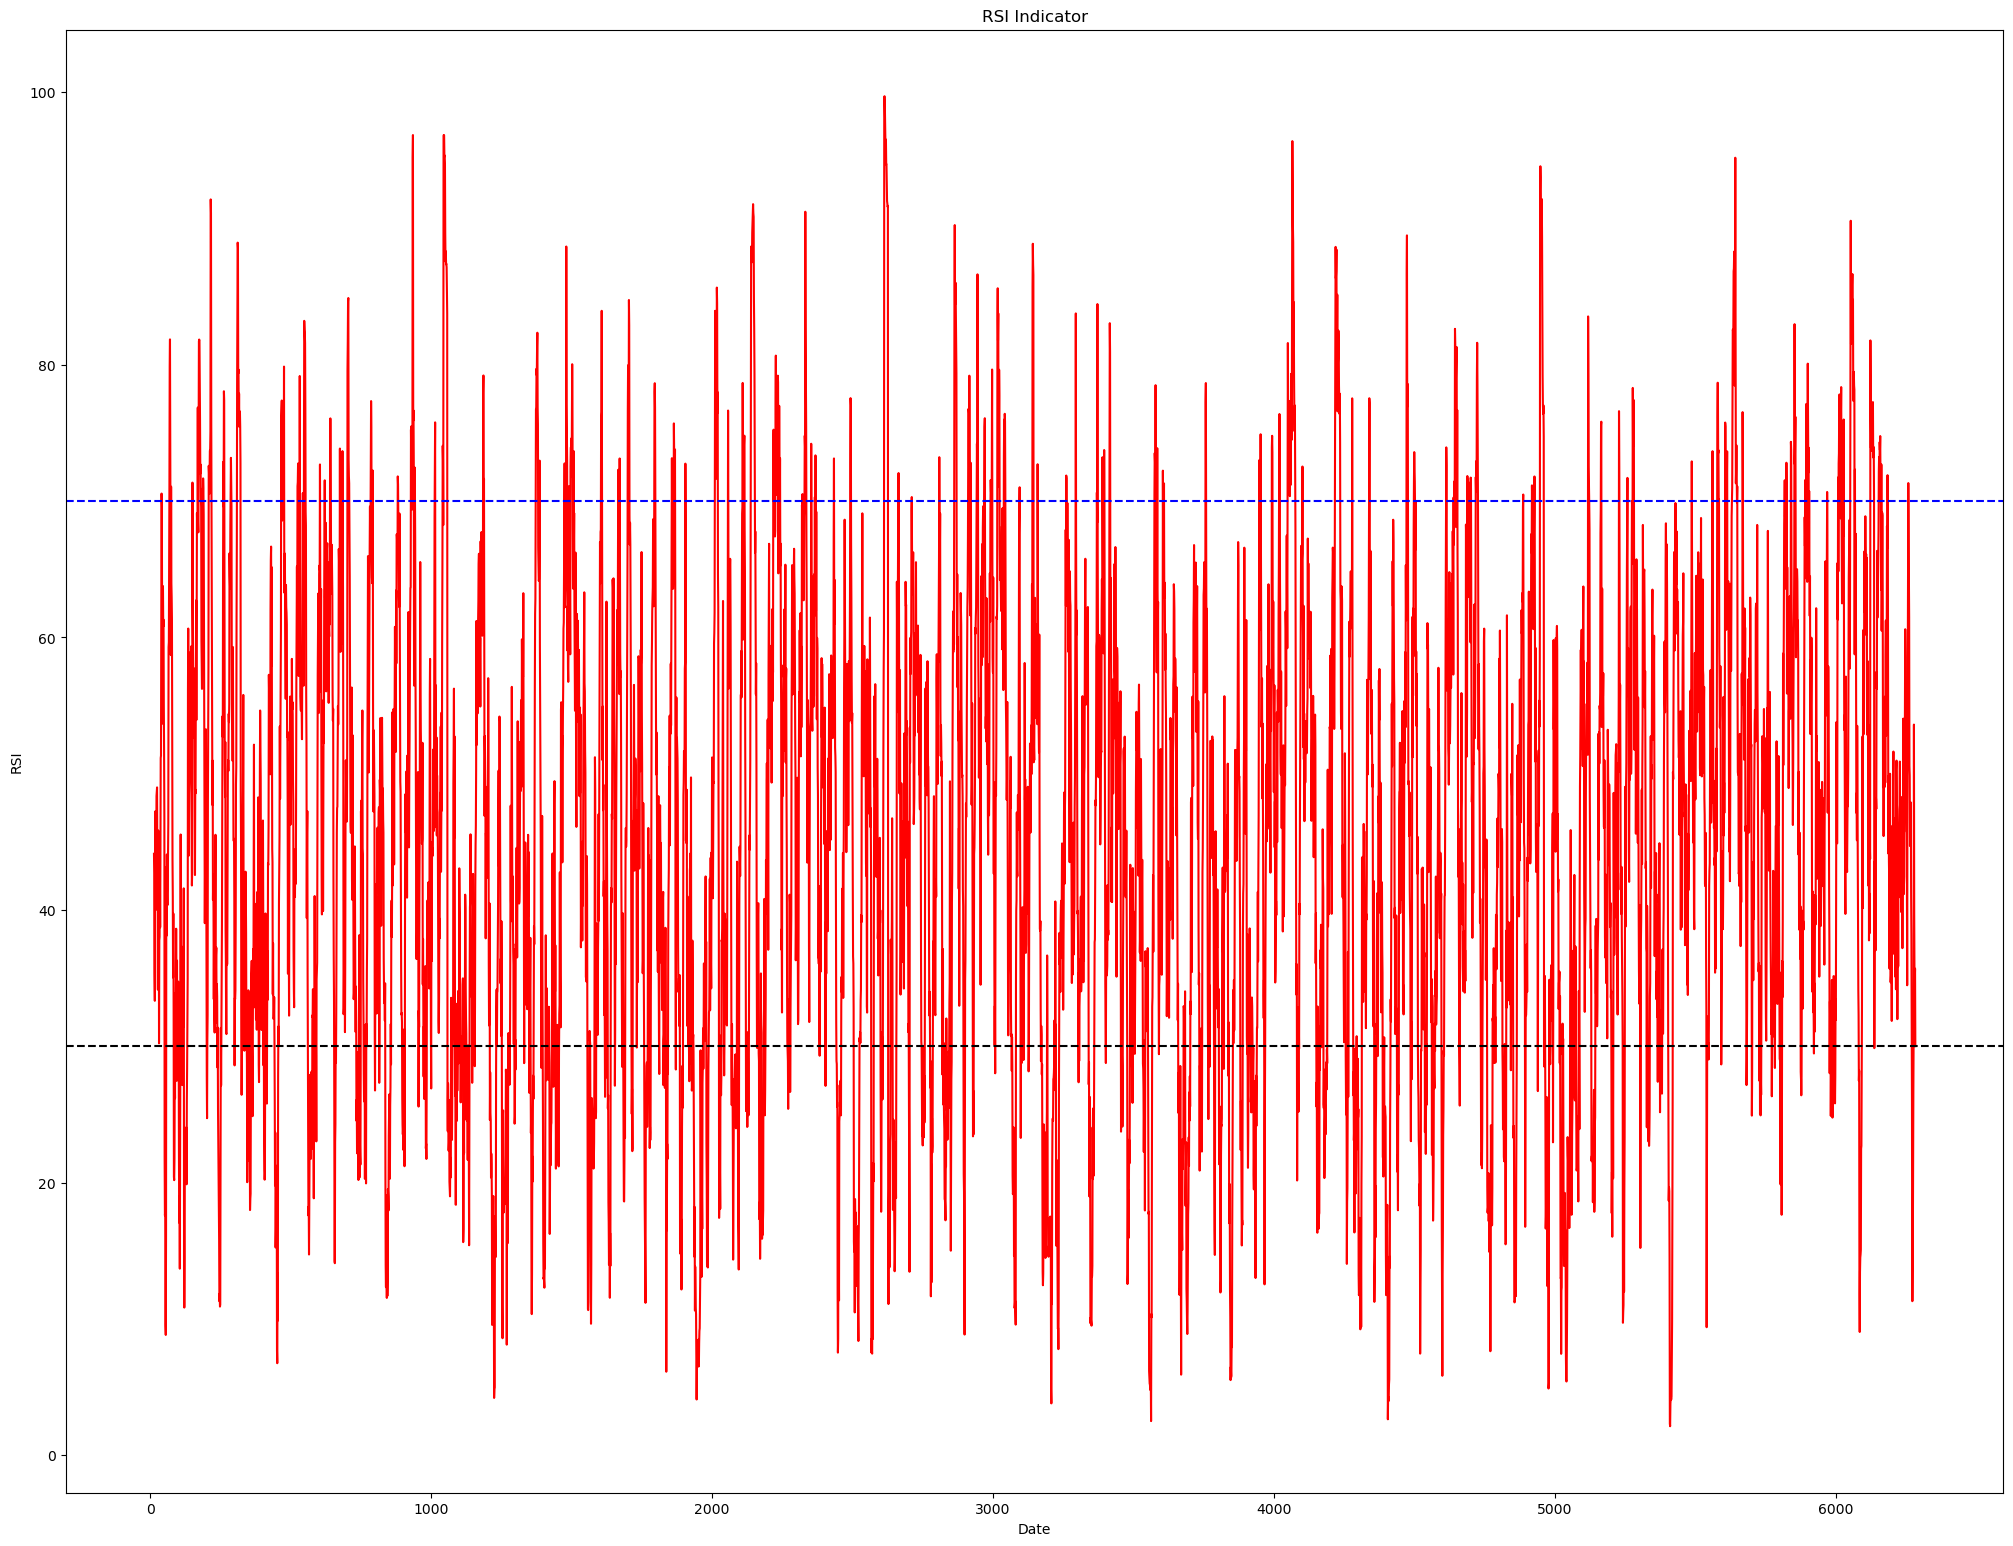

In [65]:
def calculate_rsi(data, window=14):
    delta = data.diff() #Вычисляет разницу между текущим и предыдущим значением
    gain = delta.where(delta > 0, 0) #положительные изменения
    loss = -delta.where(delta < 0, 0) #отрицательные изменен
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs)) #Рассчитывает относительную силу (RS)
    return rsi

df['RSI'] = calculate_rsi(df['Close'])

# График RSI
plt.figure(figsize=(25, 19))
plt.plot(df['RSI'], color='red')
plt.axhline(70, color='blue', linestyle='--')
plt.axhline(30, color='black', linestyle='--')
plt.title('RSI Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_5448\4114886434.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['RSI'] = calculate_rsi(df_filtered['Close'])


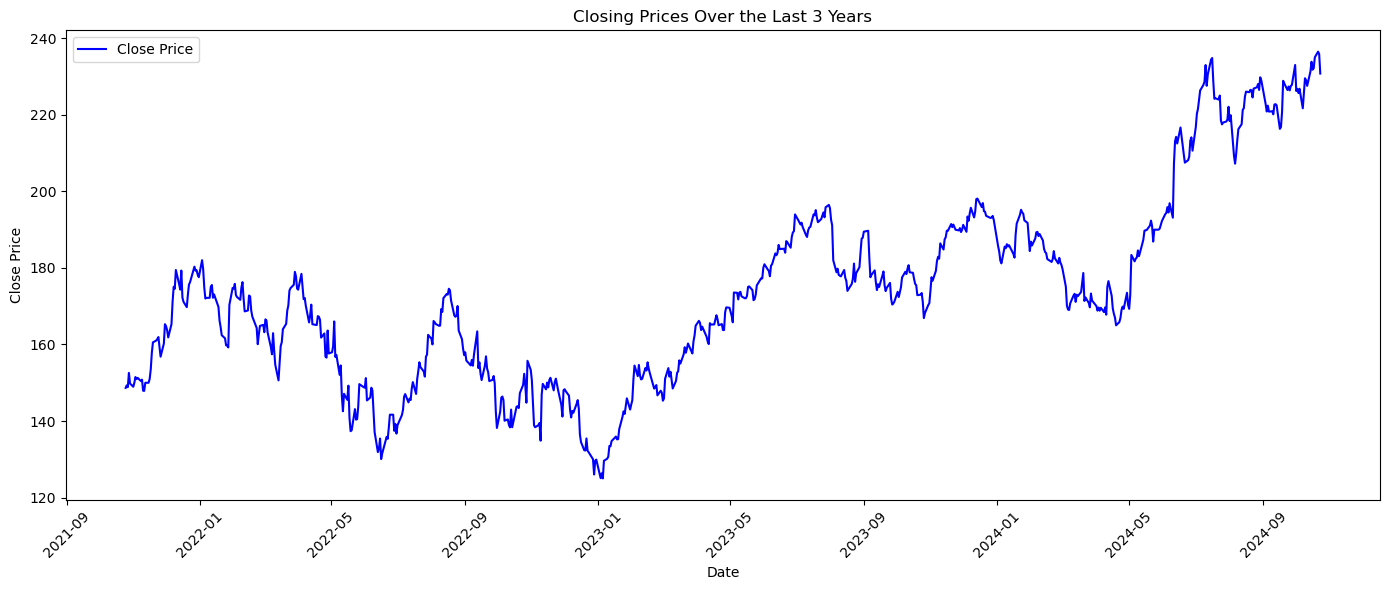

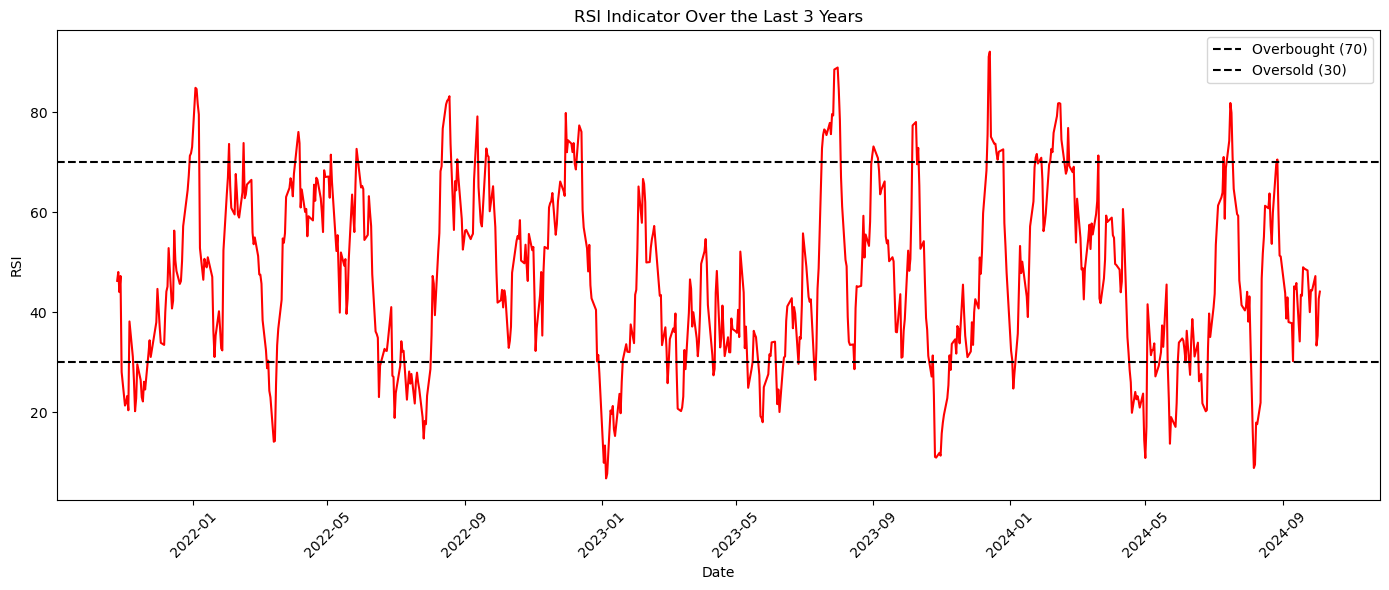

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

# Фильтруем данные за последние 3 года
end_date = df['Date'].max()  # Максимальная дата в наборе данных
start_date = end_date - pd.DateOffset(years=3)  # Дата 3 года назад
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Расчет RSI
def calculate_rsi(data, window=14): 
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_filtered['RSI'] = calculate_rsi(df_filtered['Close'])

# График цен закрытия
plt.figure(figsize=(14, 6))
plt.plot(df_filtered['Date'], df_filtered['Close'], label='Close Price', color='blue')
plt.title('Closing Prices Over the Last 3 Years')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)  # Поворот дат для удобства чтения
plt.legend()
plt.tight_layout()  # Для лучшего размещения элементов графика
plt.show()

# График RSI
plt.figure(figsize=(14, 6))
plt.plot(df_filtered['Date'], df_filtered['RSI'], color='red')
plt.axhline(70, color='black', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='black', linestyle='--', label='Oversold (30)')
plt.title('RSI Indicator Over the Last 3 Years')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#### Значения RSI варьируются от 0 до 100. Значения выше 70 обычно указывают на то, что актив перекуплен, а значения ниже 30 — что актив перепродан.

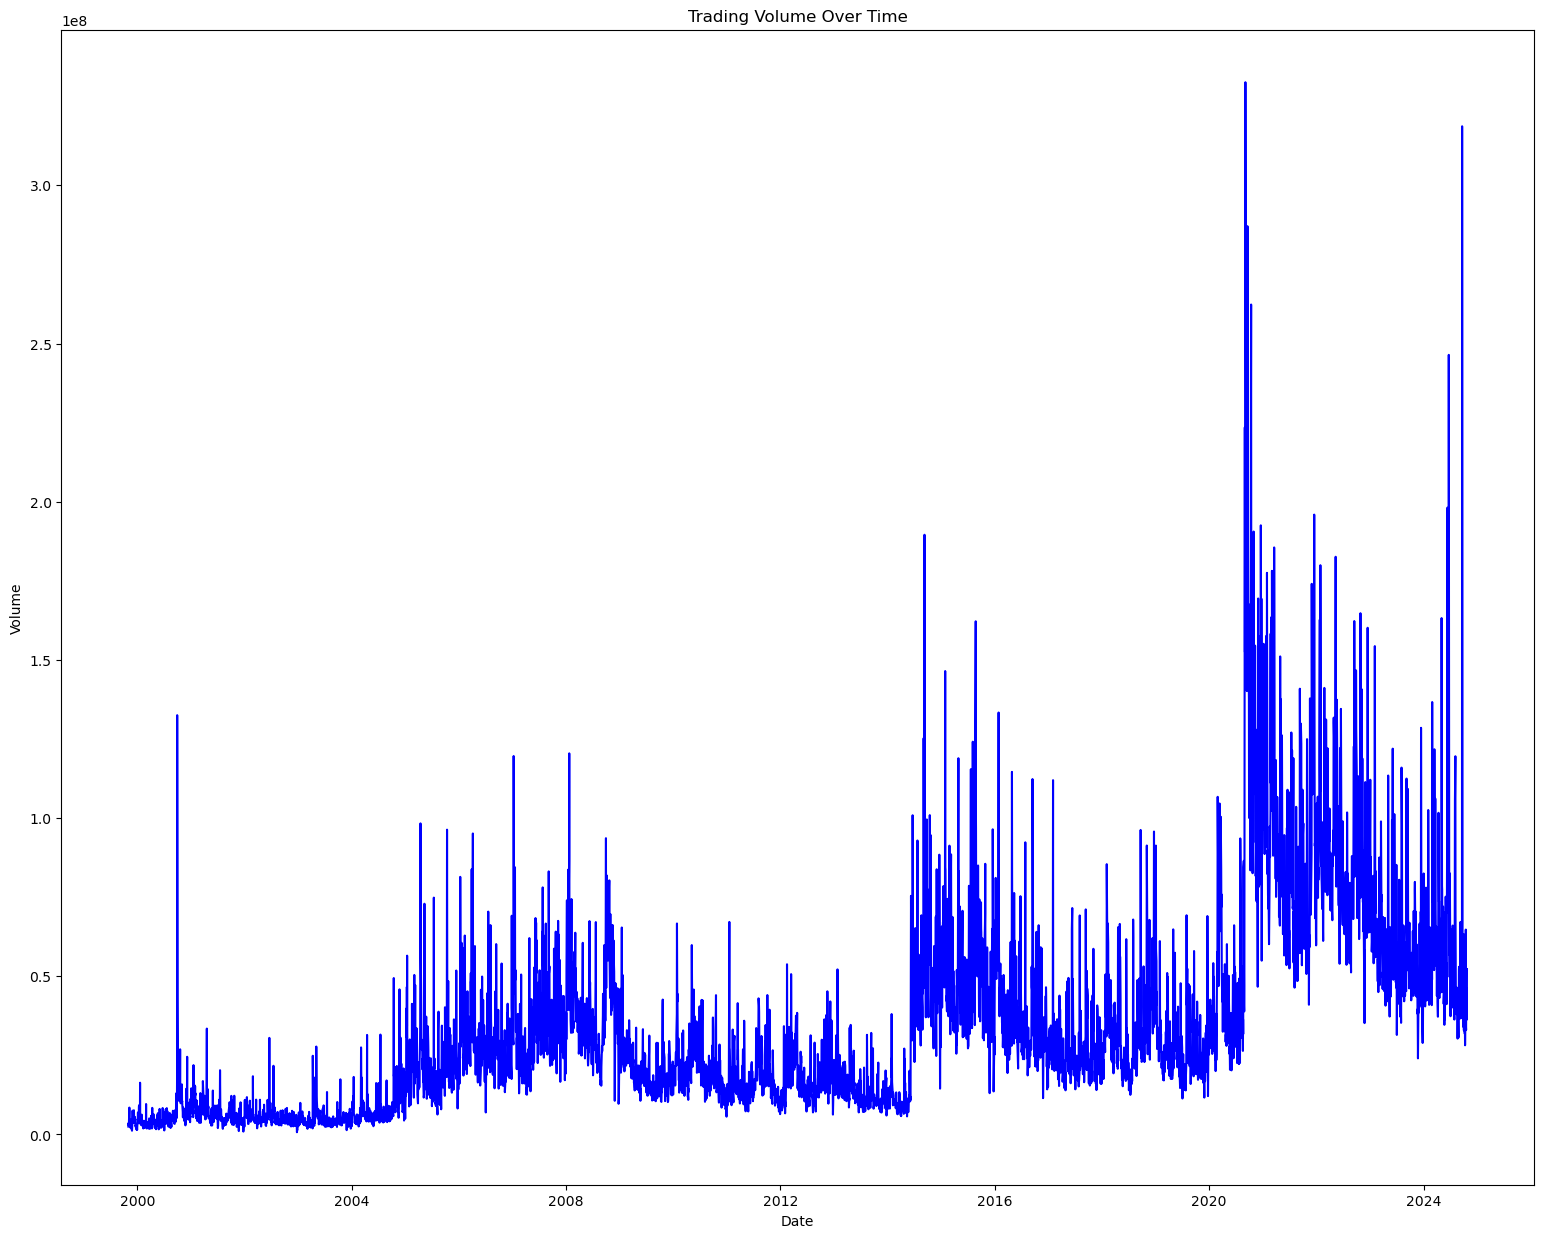

              Open    High     Low   Close     Volume  Year  Month  \
Date                                                                 
2024-09-20  229.97  233.09  227.62  228.20  318679888  2024      9   
2024-08-05  199.09  213.50  196.00  209.27  119548589  2024      8   
2024-08-02  219.15  225.60  217.71  219.86  105568560  2024      8   
2024-06-21  210.39  211.89  207.11  207.49  246421353  2024      6   
2024-06-17  213.37  218.95  212.72  216.67   93728300  2024      6   
...            ...     ...     ...     ...        ...   ...    ...   
2007-01-09   86.45   92.98   85.15   92.57  119617800  2007      1   
2006-04-06   68.30   72.05   68.20   71.24   95134600  2006      4   
2005-10-12   48.65   50.30   47.87   49.25   96338800  2005     10   
2005-04-14   38.81   39.98   36.84   37.26   98328300  2005      4   
2000-09-29   28.19   29.00   25.37   25.75  132529300  2000      9   

                SMA_50     SMA_200  Volatility        RSI  
Date                         

In [72]:
df.set_index('Date', inplace=True)

plt.figure(figsize=(19, 15))
plt.plot(df['Volume'], color='blue')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# Найдем кластеры с объемами, которые выше среднего
high_volume_threshold = df['Volume'].quantile(0.95)  # Порог на уровне 95% квантиля
high_volume_clusters = df[df['Volume'] > high_volume_threshold]
print(high_volume_clusters)


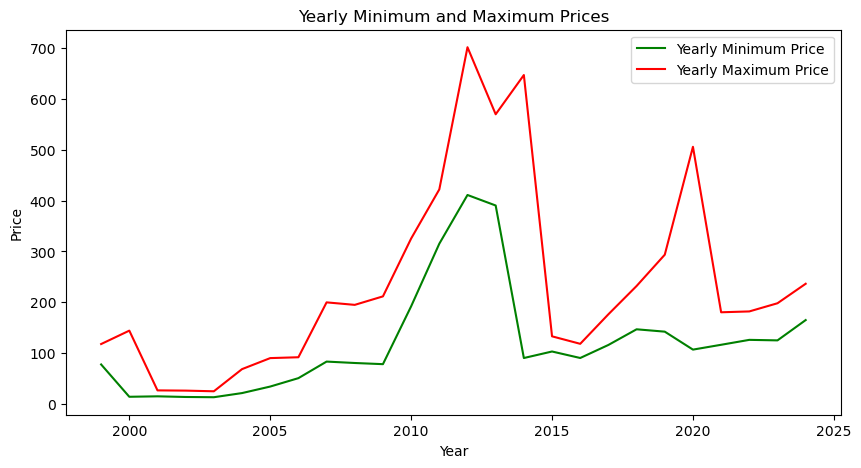

In [75]:
# Минимальные и максимальные значения по годам
yearly_min = df.groupby('Year')['Close'].min()
yearly_max = df.groupby('Year')['Close'].max()

plt.figure(figsize=(10, 5))
plt.plot(yearly_min, label='Yearly Minimum Price', color='green')
plt.plot(yearly_max, label='Yearly Maximum Price', color='red')
plt.title('Yearly Minimum and Maximum Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()


In [101]:
df

,Open,High,Low,Close,Volume,Date,Volatility,7_day_MA,30_day_MA,Year
0,234.080,235.144,227.76,230.76,52286979,2024-10-23,7.384,NaN,NaN,2024
1,233.885,236.220,232.60,235.86,38846578,2024-10-22,3.620,NaN,NaN,2024
2,234.450,236.850,234.45,236.48,36254470,2024-10-21,2.400,NaN,NaN,2024
3,236.180,236.180,234.01,235.00,46431472,2024-10-18,2.170,NaN,NaN,2024
4,233.430,233.850,230.52,232.15,32993810,2024-10-17,3.330,NaN,NaN,2024
...,...,...,...,...,...,...,...,...,...,...
6280,84.620,88.370,84.00,88.31,3721500,1999-11-05,4.370,91.150000,97.890333,1999
6281,82.060,85.370,80.62,83.62,3384700,1999-11-04,4.750,90.318571,97.344333,1999
6282,81.620,83.250,81.00,81.50,2932700,1999-11-03,2.250,89.015714,96.784000,1999
6283,78.000,81.690,77.31,80.25,3564600,1999-11-02,4.380,87.301429,96.225667,1999


In [103]:
import pandas as pd

# 1. Нахождение максимума закрывающих цен по месяцам (используем 'ME' вместо 'M')
monthly_max_close = df.resample('ME')['Close'].max()
print("Максимальные закрывающие цены по месяцам:")
print(monthly_max_close)

# 2. Определение наиболее частого месяца, используя индекс
# Мы можем создать новый столбец для месяца
df['Month'] = df.index.month
most_common_month = df['Month'].mode()[0]
print(f"Наиболее частый месяц: {most_common_month}")

# 3. Определение дня недели
df['DayOfWeek'] = df.index.dayofweek  # 0 = понедельник, 6 = воскресенье

# 4. Подсчет закрывающих цен по дням недели
weekly_close = df.groupby('DayOfWeek')['Close'].sum()
print("Закрывающие цены по дням недели:")
print(weekly_close)

# Определение дня недели с наибольшими закрывающими ценами
most_sales_day = weekly_close.idxmax()
print(f"День недели с наибольшими закрывающими ценами: {most_sales_day} (где 0 = понедельник)")


Максимальные закрывающие цены по месяцам:
Date
1999-11-30     97.87
1999-12-31    117.81
2000-01-31    113.50
2000-02-29    119.00
2000-03-31    144.19
               ...  
2024-06-30    216.67
2024-07-31    234.82
2024-08-31    229.79
2024-09-30    233.00
2024-10-31    236.48
Freq: ME, Name: Close, Length: 300, dtype: float64
Наиболее частый месяц: 8
Закрывающие цены по дням недели:
DayOfWeek
0    204932.5437
1    224290.9835
2    224383.2207
3    221650.3299
4    219970.3106
Name: Close, dtype: float64
День недели с наибольшими закрывающими ценами: 2 (где 0 = понедельник)


In [107]:
import pandas as pd

# 1. Нахождение максимума объемов продаж по месяцам (используем 'ME' вместо 'M')
monthly_max_volume = df.resample('ME')['Volume'].max()
print("Максимальные объемы продаж по месяцам:")
print(monthly_max_volume)

# 2. Определение наиболее частого месяца, используя индекс
# Мы можем создать новый столбец для месяца
df['Month'] = df.index.month
most_common_month = df['Month'].mode()[0]
print(f"\nНаиболее частый месяц: {most_common_month}")

# 3. Определение дня недели
df['DayOfWeek'] = df.index.dayofweek  # 0 = понедельник, 6 = воскресенье

# 4. Подсчет объемов продаж по дням недели
weekly_volume = df.groupby('DayOfWeek')['Volume'].sum()
print("\nОбъемы продаж по дням недели:")
print(weekly_volume)

# Определение дня недели с наибольшими объемами продаж
most_sales_day = weekly_volume.idxmax()
print(f"\nДень недели с наибольшими объемами продаж: {most_sales_day} (где 0 = понедельник)")


Максимальные объемы продаж по месяцам:
Date
1999-11-30      8490400
1999-12-31      7635700
2000-01-31     16349400
2000-02-29      4337000
2000-03-31      9616100
                ...    
2024-06-30    246421353
2024-07-31     66034585
2024-08-31    119548589
2024-09-30    318679888
2024-10-31     64751367
Freq: ME, Name: Volume, Length: 300, dtype: int64

Наиболее частый месяц: 8

Объемы продаж по дням недели:
DayOfWeek
0    37792674695
1    42596380868
2    42956460626
3    41879984139
4    43040308174
Name: Volume, dtype: int64

День недели с наибольшими объемами продаж: 4 (где 0 = понедельник)


C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packa

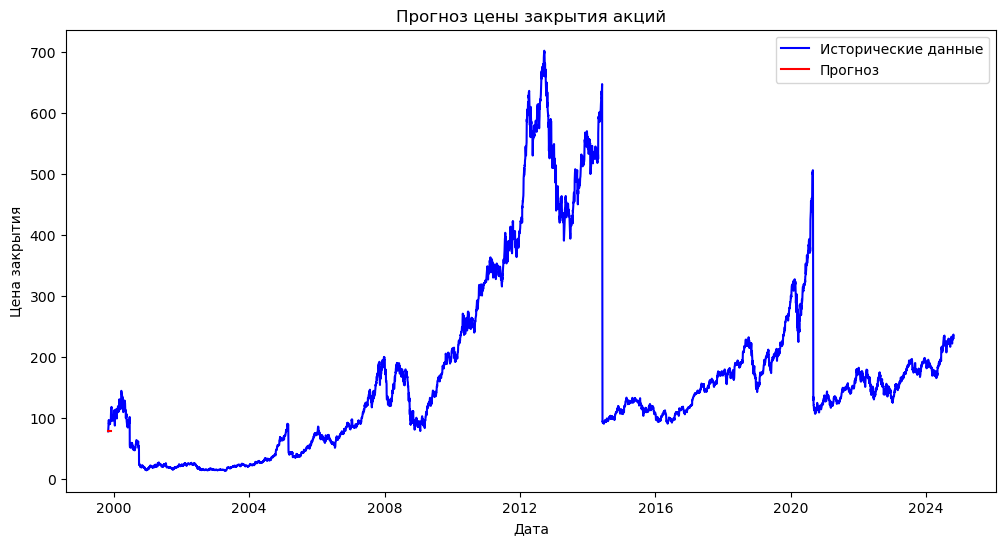

In [109]:
from statsmodels.tsa.arima.model import ARIMA

# Обучение модели ARIMA
model = ARIMA(df['Close'], order=(1, 1, 1))  # Замените (p, d, q) на оптимальные значения после подбора
results = model.fit()

# Прогноз на следующие 30 дней
forecast_steps = 30
forecast = results.forecast(steps=forecast_steps)

# Создаем даты для прогноза
forecast_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Исторические данные', color='blue')
plt.plot(forecast_dates, forecast, label='Прогноз', color='red')
plt.title('Прогноз цены закрытия акций')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend()
plt.show()


In [86]:
df3.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Date           0
Volatility     0
7_day_MA       6
30_day_MA     29
Year           0
dtype: int64

In [87]:
df3.dropna()

,Open,High,Low,Close,Volume,Date,Volatility,7_day_MA,30_day_MA,Year
29,222.500,223.55,219.82,222.77,37498225,2024-09-12,3.73,222.305714,227.696333,2024
30,221.455,223.09,217.89,222.66,44587072,2024-09-11,5.20,221.514286,227.426333,2024
31,218.920,221.48,216.73,220.11,51591033,2024-09-10,4.75,220.262857,226.901333,2024
32,220.820,221.27,216.71,220.91,67179965,2024-09-09,4.56,220.294286,226.382333,2024
33,223.950,225.24,219.77,220.82,48423011,2024-09-06,5.47,220.870000,225.909667,2024
...,...,...,...,...,...,...,...,...,...,...
6280,84.620,88.37,84.00,88.31,3721500,1999-11-05,4.37,91.150000,97.890333,1999
6281,82.060,85.37,80.62,83.62,3384700,1999-11-04,4.75,90.318571,97.344333,1999
6282,81.620,83.25,81.00,81.50,2932700,1999-11-03,2.25,89.015714,96.784000,1999
6283,78.000,81.69,77.31,80.25,3564600,1999-11-02,4.38,87.301429,96.225667,1999


In [100]:
df4=df3.drop(columns=['7_day_MA','30_day_MA','Year'])

In [101]:
# Рассматриваем цены закрытия для прогнозирования
ts = df4['Close']

# Просмотр первых строк временного ряда
print(ts.head())


0    230.76
1    235.86
2    236.48
3    235.00
4    232.15
Name: Close, dtype: float64


In [102]:
from statsmodels.tsa.stattools import adfuller

# Применение теста Дики-Фуллера
result = adfuller(ts)

# Результаты теста
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] > 0.05:
    print("Временной ряд нестационарен, требуется дифференцирование.")
else:
    print("Временной ряд стационарен.")


ADF Statistic: -2.520186761345393
p-value: 0.1106396048052734
Временной ряд нестационарен, требуется дифференцирование.


In [103]:
ts_diff = ts.diff().dropna()

In [97]:
import itertools
import statsmodels.api as sm

# Определение диапазонов для p, d, q
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Ищем модель с наименьшим AIC
best_aic = float("inf")
best_order = None
for param in pdq:
    try:
        model = sm.tsa.ARIMA(ts_diff, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = param
    except:
        continue

print(f'Лучшие параметры ARIMA: {best_order}')


C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init

Лучшие параметры ARIMA: (0, 0, 0)


In [104]:
model = sm.tsa.ARIMA(ts_diff, order=best_order)
results = model.fit()

# Печатаем резюме модели
print(results.summary())

C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6284
Model:                          ARIMA   Log Likelihood              -23030.154
Date:                Thu, 24 Oct 2024   AIC                          46064.308
Time:                        14:05:27   BIC                          46077.799
Sample:                             0   HQIC                         46068.982
                               - 6284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0244      0.247     -0.099      0.921      -0.508       0.459
sigma2        89.2902      0.099    903.638      0.000      89.097      89.484
Ljung-Box (L1) (Q):                   0.19   Jarque-